In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [30]:
X, y = make_classification(n_samples = 1000, n_features = 20 , n_informative = 15 , n_classes = 2 , random_state = 42)

In [31]:
model = RandomForestClassifier(n_estimators = 100, random_state= 42)

In [32]:
cv_scores= cross_val_score(model, X, y, cv = 5)
print(f"Cross-validation scores : {cv_scores}")
print(f"Mean CV score : {cv_scores.mean() : .4f}")

Cross-validation scores : [0.885 0.925 0.905 0.88  0.92 ]
Mean CV score :  0.9030


In [33]:
train_sizes, train_scores, test_scores = learning_curve(model,X , y ,train_sizes = np.linspace(0.1, 1.0, 10), cv = 5)

In [34]:
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

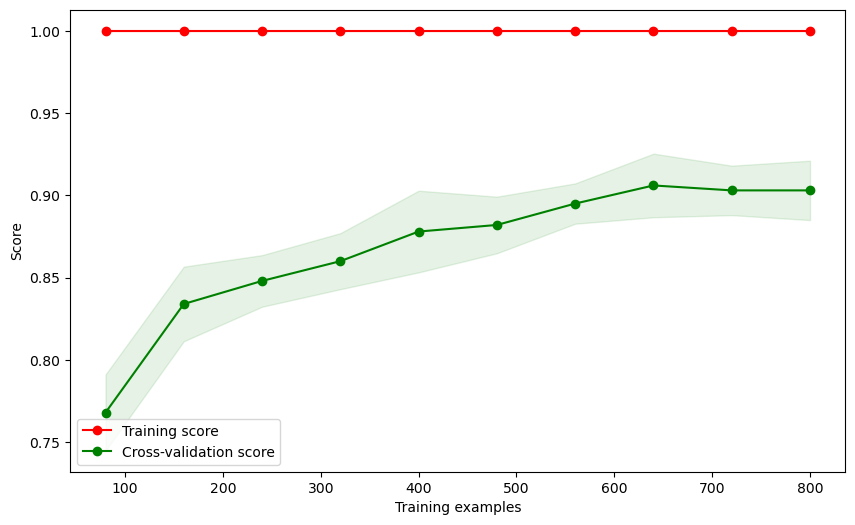

In [36]:
plt.figure(figsize = (10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "g")

plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label= "Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label= "Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc = "best")
plt.show()